# Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Analysis


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/2022/충남대학교/MOGAKCO/Space_Titanic/train.csv', index_col='PassengerId').reset_index(drop=True)
test_df = pd.read_csv('/content/drive/MyDrive/2022/충남대학교/MOGAKCO/Space_Titanic/test.csv',  index_col='PassengerId').reset_index(drop=True)
submission_df = pd.read_csv('/content/drive/MyDrive/2022/충남대학교/MOGAKCO/Space_Titanic/sample_submission.csv')

In [ ]:
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 401.1+ KB


In [ ]:
# Nan값 확인
print('TRAIN SET MISSING VALUES:')
print(train_df.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(test_df.isna().sum())

TRAIN SET MISSING VALUES:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

TEST SET MISSING VALUES:
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [ ]:
HP_value_counts = train_df['HomePlanet'].value_counts()
print(HP_value_counts)

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


In [ ]:
Cabin_value_counts = train_df['Cabin'].value_counts()
print(Cabin_value_counts)

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


In [ ]:
D_value_counts = train_df['Destination'].value_counts()
print(D_value_counts)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [ ]:
RS_value_counts = train_df['RoomService'].value_counts()
print(RS_value_counts)

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64


In [ ]:
FD_value_counts = train_df['FoodCourt'].value_counts()
print(FD_value_counts)

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64


In [ ]:
SM_value_counts = train_df['ShoppingMall'].value_counts()
print(SM_value_counts)

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64


In [ ]:
VR_value_counts = train_df['VRDeck'].value_counts()
print(VR_value_counts)

0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64


# Object 형태의 데이터를 숫자로 변경한다.
- HomePlanet : Earth/Europa/Mars
- CryoSleep : False/True
- Cabin_Desk : A~G, T
- Cabin_Side : P, S
- Destination : VIP
- Transported : 0, 1

In [ ]:
train_df_1 = train_df.copy()
test_df_1 = test_df.copy()

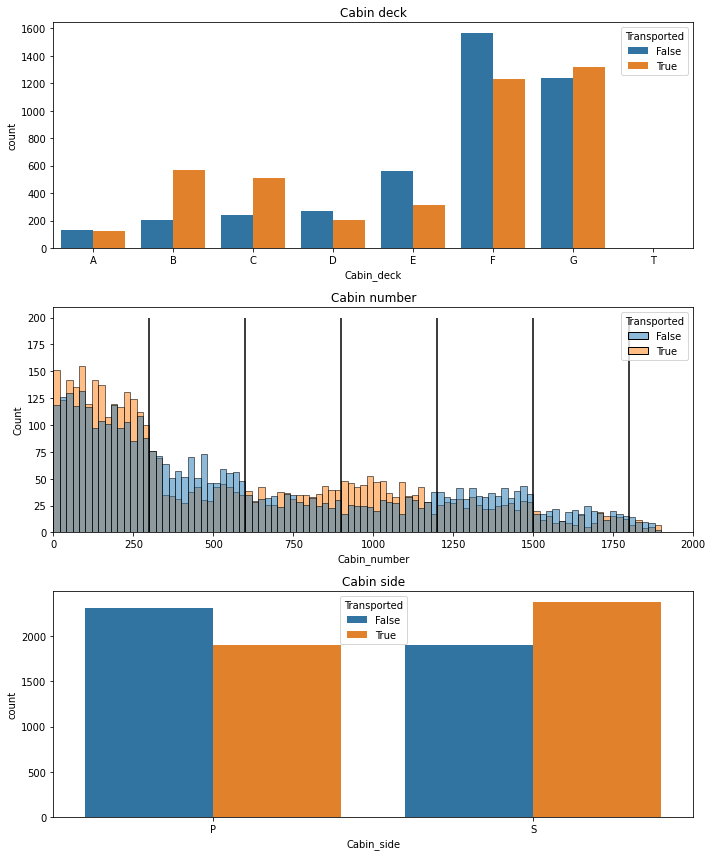

In [ ]:
# Cabin은 deck, number, side 세 가지로 분류하여 채운다.
train_df_1['Cabin'].fillna('Z/9999/Z', inplace=True)
test_df_1['Cabin'].fillna('Z/9999/Z', inplace=True)

train_df_1['Cabin_deck'] = train_df_1['Cabin'].apply(lambda x: x.split('/')[0])
train_df_1['Cabin_number'] = train_df_1['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train_df_1['Cabin_side'] = train_df_1['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
test_df_1['Cabin_deck'] = test_df_1['Cabin'].apply(lambda x: x.split('/')[0])
test_df_1['Cabin_number'] = test_df_1['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test_df_1['Cabin_side'] = test_df_1['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
train_df_1.loc[train_df_1['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train_df_1.loc[train_df_1['Cabin_number']==9999, 'Cabin_number']=np.nan
train_df_1.loc[train_df_1['Cabin_side']=='Z', 'Cabin_side']=np.nan
test_df_1.loc[test_df_1['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test_df_1.loc[test_df_1['Cabin_number']==9999, 'Cabin_number']=np.nan
test_df_1.loc[test_df_1['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
train_df_1.drop('Cabin', axis=1, inplace=True)
test_df_1.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df_1, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train_df_1, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train_df_1, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

In [ ]:
# Object 형태의 데이터의 nan값들을 모두 -1이라고 한다.
object_cols = [i for i in train_df_1.columns if train_df_1[i].dtype == 'O']

train_df_1[object_cols] = train_df_1[object_cols].fillna(-1)
test_df_1[object_cols] = test_df_1[object_cols].fillna(-1)

print('TRAIN DATA MISSING VALUES')
print(train_df_1.isna().sum())
print('')
print('TEST DATA MISSING VALUES')
print(test_df_1.isna().sum())

TRAIN DATA MISSING VALUES
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
Cabin_deck        0
Cabin_number    199
Cabin_side        0
dtype: int64

TEST DATA MISSING VALUES
HomePlanet        0
CryoSleep         0
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name              0
Cabin_deck        0
Cabin_number    100
Cabin_side        0
dtype: int64


In [ ]:
# Transported의 'True', 'False'를 1, 0으로 변경
train_df_1['Transported'] = train_df_1['Transported'].astype(np.int8)

train_df_1['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [ ]:
train_df_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1.0,S


In [ ]:
test_df_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_number,Cabin_side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S


# 결측값 처리하기

- HomePlanet은 Earth가 가장 많으므로 Earth로 채운다.
- CryoSleep의 Nan값을 가진 행을 삭제한다.
- Cabin은 deck, number, side 세 가지로 분류하여 채운다.(일단은 삭제한다)
- Destination은 TRAPPIST-1e가 가장 많으므로 TRAPPIST-1e  로 채운다.
- Age는 가장 많은 값인 24로 채운다. (유지)
- VIP는 False로 채운다.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck은 0값이 가장 많으므로 0으로 채운다 (유지)
- Name은 모두 삭제한다


In [ ]:
train_df_2 = train_df_1.copy()
test_df_2 = test_df_1.copy()

print('TRAIN DATA 1 MISSING VALUES')
print(train_df_2.isna().sum())
print('')
print('TEST DATA 1 MISSING VALUES')
print(test_df_2.isna().sum())

TRAIN DATA 1 MISSING VALUES
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
Cabin_deck        0
Cabin_number    199
Cabin_side        0
dtype: int64

TEST DATA 1 MISSING VALUES
HomePlanet        0
CryoSleep         0
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name              0
Cabin_deck        0
Cabin_number    100
Cabin_side        0
dtype: int64


### Name

In [ ]:
# Name은 모두 삭제한다
train_df_2.drop('Name', axis=1, inplace=True)
test_df_2.drop('Name', axis=1, inplace=True)

### Age

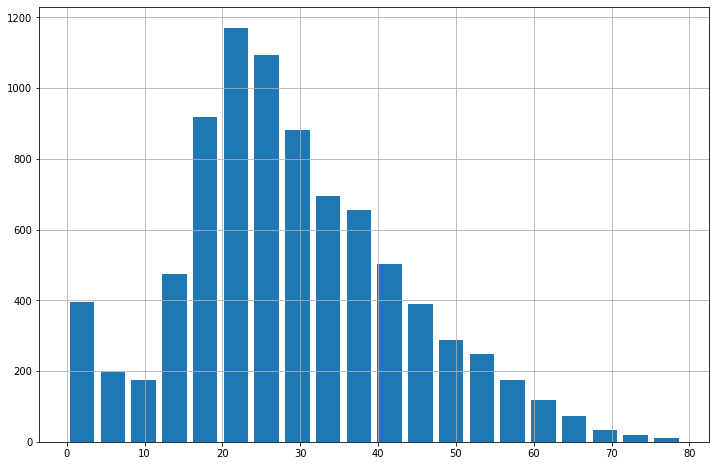

In [ ]:
fig=plt.figure(figsize=(12,8))
train_df_2['Age'].hist(bins=20, rwidth=0.8)

In [ ]:
train_df_2['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [ ]:
# Age는 평균값으로 채운다.
# train_df_2['Age'].fillna(train_df_2['Age'].mean(), inplace=True)
# test_df_2['Age'].fillna(test_df_2['Age'].mean(), inplace=True)

# Age는 최빈값인 24로 채운다
train_df_2['Age'] = train_df_2['Age'].fillna(24.0)
test_df_2['Age'] = test_df_2['Age'].fillna(24.0)

print(train_df_2.isna().sum())
print("")
print(test_df_2.isna().sum())

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin_deck        0
Cabin_number    199
Cabin_side        0
dtype: int64

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_deck        0
Cabin_number    100
Cabin_side        0
dtype: int64


### RS, FC, SM, S, VR

In [ ]:
# RS, FC, SM, S, VR의 결측치는 모드 0으로 채운다 -> 유지
train_df_2['RoomService'] = train_df_2['RoomService'].fillna(0)
test_df_2['RoomService'] = test_df_2['RoomService'].fillna(0)

train_df_2['FoodCourt'] = train_df_2['FoodCourt'].fillna(0)
test_df_2['FoodCourt'] = test_df_2['FoodCourt'].fillna(0)

train_df_2['ShoppingMall'] = train_df_2['ShoppingMall'].fillna(0)
test_df_2['ShoppingMall'] = test_df_2['ShoppingMall'].fillna(0)

train_df_2['Spa'] = train_df_2['Spa'].fillna(0)
test_df_2['Spa'] = test_df_2['Spa'].fillna(0)

train_df_2['VRDeck'] = train_df_2['VRDeck'].fillna(0)
test_df_2['VRDeck'] = test_df_2['VRDeck'].fillna(0)

print(train_df_2.isna().sum())
print("")
print(test_df_2.isna().sum())

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin_deck        0
Cabin_number    199
Cabin_side        0
dtype: int64

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Cabin_deck        0
Cabin_number    100
Cabin_side        0
dtype: int64


### Cabin_number

In [ ]:
# Cabin_number도 일단은 삭제하고 진행
train_df_2.drop('Cabin_number', axis=1, inplace=True)
test_df_2.drop('Cabin_number', axis=1, inplace=True)

### Object 결측치들 해결
- 먼저 Object의 Columns를 dummies를 통해 바꿔준다.

In [ ]:
train_df_2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,S


In [ ]:
obj_cols = [i for i in train_df_2.columns if train_df_2[i].dtype == "O"]


print("TRAIN DATA\n")
for i in obj_cols:
    print(train_df_2[i].unique())

print("\n\nTEST DATA\n")
for i in obj_cols:
    print(test_df_2[i].unique())

TRAIN DATA

['Europa' 'Earth' 'Mars' -1]
[False True -1]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' -1]
[False True -1]
['B' 'F' 'A' 'G' -1 'E' 'D' 'C' 'T']
['P' 'S' -1]


TEST DATA

['Earth' 'Europa' 'Mars' -1]
[True False -1]
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' -1]
[False -1 True]
['G' 'F' 'C' 'B' 'D' 'E' -1 'A' 'T']
['S' 'P' -1]


In [ ]:
# dummies를 이용하여 각 Column 분류
train_df_3 = pd.concat([train_df_2, pd.get_dummies(train_df_2[obj_cols], drop_first=True)], axis=1).drop(obj_cols, axis=1)
test_df_3 = pd.concat([test_df_2, pd.get_dummies(test_df_2[obj_cols], drop_first=True)], axis=1).drop(obj_cols, axis=1)

In [ ]:
train_df_3.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
test_df_3.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
train_df_3.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'Cabin_deck_A',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_P',
       'Cabin_side_S'],
      dtype='object')

In [ ]:
test_df_3.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

# 모델 생성 및 예측

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X = train_df_3.drop('Transported', axis=1)
Y = train_df_3['Transported']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((7823, 26), (7823,), (870, 26), (870,))

In [ ]:
# Logistic regression
lr = LogisticRegression(max_iter=1000)
lr_model = lr.fit(X_train,Y_train)
Y_pred = lr_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_log = accuracy_score(Y_pred, Y_valid)
accuracy_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7977011494252874

In [ ]:
 # Random forest
rf = RandomForestClassifier(n_estimators=100)
rf_model = rf.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_random_forest = accuracy_score(Y_pred, Y_valid)
accuracy_random_forest

0.8149425287356322

In [ ]:
# Decision tree
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, Y_train)
Y_pred  = dt_model.predict(X_valid)

# Measuring accuracy on Testing Data
acc_decision_tree = accuracy_score(Y_pred, Y_valid)
acc_decision_tree

0.7505747126436781

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn.fit(X_train,  Y_train)
Y_pred = knn_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_knn = accuracy_score(Y_pred, Y_valid)
accuracy_knn

0.7758620689655172

In [ ]:
# Support Vector Machines
svc = SVC()
svc_model = svc.fit(X_train, Y_train)
Y_pred = svc_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_svc = accuracy_score(Y_pred, Y_valid)
accuracy_svc

0.7954022988505747

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian_model = gaussian.fit(X_train, Y_train)
Y_pred = gaussian_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_gaussian = accuracy_score(Y_pred, Y_valid)
accuracy_gaussian

0.7632183908045977

In [ ]:
#Gradient boosting
g_boost = GradientBoostingClassifier()
g_boost_model = g_boost.fit(X_train,Y_train)
Y_pred = g_boost_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_gboost = accuracy_score(Y_pred, Y_valid)
accuracy_gboost

0.8114942528735632

In [ ]:
#XGB Classifier
xgb_classifier = XGBClassifier()
xgb_model = xgb_classifier.fit(X_train,Y_train)
Y_pred = xgb_model.predict(X_valid)

accuracy_xgb = accuracy_score(Y_pred, Y_valid)
accuracy_xgb

0.8103448275862069

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree', 'Gradient Boosting', 'XGB Classifier'],
    'Score': [accuracy_svc, accuracy_knn, accuracy_log, 
              accuracy_random_forest, accuracy_gaussian, acc_decision_tree, accuracy_gboost, accuracy_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.814943
6,Gradient Boosting,0.811494
7,XGB Classifier,0.810345
2,Logistic Regression,0.797701
0,Support Vector Machines,0.795402
1,KNN,0.775862
4,Naive Bayes,0.763218
5,Decision Tree,0.750575


In [ ]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_estimators=100)
xgb = XGBClassifier()
gbm = GradientBoostingClassifier()

votingC = VotingClassifier(estimators=[('RandomForest', rf), ('XGBoost', xgb), ('GBM', gbm)],
                           voting='soft',
                           n_jobs=-1)

# fit training data (df_train)
votingC.fit(X_train,Y_train)

X_test = test_df_3

predictions = votingC.predict(X_test)

test_data = pd.read_csv("/content/drive/MyDrive/2022/충남대학교/MOGAKCO/Space_Titanic/test.csv")
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('submission.csv', index=False)

In [ ]:
predictions = rf_model.predict(test_df_3)


test_data = pd.read_csv("/content/drive/MyDrive/2022/충남대학교/MOGAKCO/Space_Titanic/test.csv")
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('Submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
predictions = g_boost_model.predict(test_df_3)


test_data = pd.read_csv("/content/drive/MyDrive/2022/충남대학교/MOGAKCO/Space_Titanic/test.csv")
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('Submission_gbost.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
predictions = xgb_model.predict(test_df_3)


test_data = pd.read_csv("/content/drive/MyDrive/2022/충남대학교/MOGAKCO/Space_Titanic/test.csv")
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('Submission_xgb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
